### Homework 3.4 - Testing out filters

We are testing out the following filters:

- Low pass filter
- High pass filter
- Band filter
- Guassian blur filter

Pick an image of your choice and apply those filters on it.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [59]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab as py
from scipy import misc, fftpack
%matplotlib inline

Credit: helped from Thuntita kub

Steps:
<br>
> 1st - We created a gray image from original image
<br>
> 2nd - Then we Fast Fourier Fourier Transform the gray image and we shifted it
<br>
> 3rd - We then created a Mask of the image (code from in class)
<br>
> 4th - Created a filtered_image by multiplying shifted image with the mask
<br>
> 5th - Shifted the filtered_image
<br>
> 6th - Inverse Fast Fourier Transform back, obtaining filtered image
<br>

We will followed the same steps mentioned above but what change will be how we come up with the mask of the image because each filter have different mask

MASK FOR EACH FILTER (we set Radius = 100)

>LOW PASS: X^2 + Y^2 < R^2
<br>
>HIGH PASS: X^2 + Y^2 > R^2

For BAND FILTER We will crete two mask and both mask will be low pass filter mask but with one lower in radius
<br>
We then XOR both mask to create a Doughnut type shape for our mask

> M = X**2 + Y**2 < R**2 
<br>
M2 = X**2 + Y**2 < (R-5)**2
<br>
M = M ^ M2

For GUASSIAN FILTER we will create a mask by applying the guassian distribution formula to our X and Y

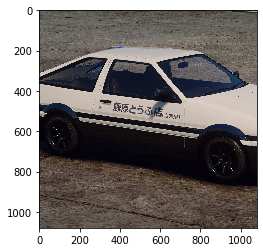

In [60]:
image = mpimg.imread('images/ae86.png')
py.imshow(image)
py.show()

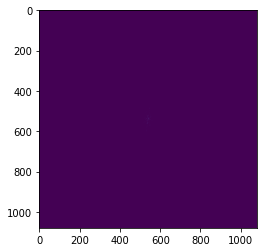

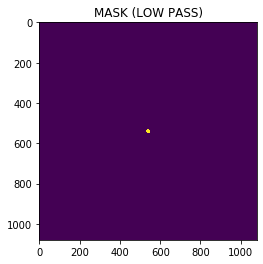

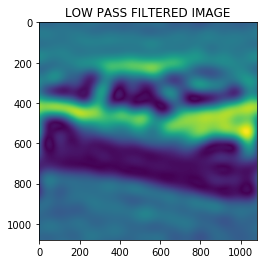

In [63]:
# LOW PASS FILTER

n = 1081
# Make gray image
grayim = image[:,:,0]

# Fast fourier gray image then shift the image
D1 = fftpack.fft2(grayim)/n
D2 = fftpack.fftshift(D1)

abs_image = np.abs(D2)
py.imshow(abs_image)
py.show()

# Making "mask" of image
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I
R = 10
X = x[:, np.newaxis]
Y = y[np.newaxis, :]

# Mask of the image
M = X**2 + Y**2 < R**2

# Plot the mask
DD1 = fftpack.fft2(M)/n
DD2 = fftpack.fftshift(DD1)
D3 = fftpack.fft2(DD1)/n
abs_image = np.abs(D3)
py.title("MASK (LOW PASS)")
py.imshow(abs_image)
py.show()


# Then shifted filtered_image(shifted_image*MASK)
# Then inverse F.T.
# Then plot
f_filtered_shifted = np.fft.fftshift(D2*M)
inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)
py.title("LOW PASS FILTERED IMAGE")
py.imshow(filtered_img)
py.show()

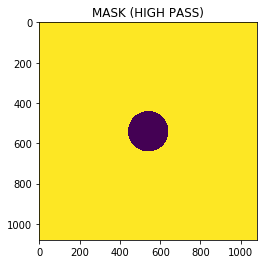

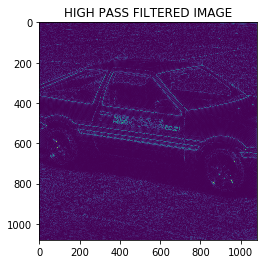

In [95]:
# HIGH PASS FILTER
R = 100
M = X**2 + Y**2 > R**2

DD1 = fftpack.fft2(M)/n
DD2 = fftpack.fftshift(DD1)
D3 = fftpack.fft2(DD1)/n


abs_image = np.abs(D3)
py.imshow(abs_image)
py.title("MASK (HIGH PASS)")
py.show()


f_filtered_shifted = np.fft.fftshift(D2*M)
inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)
py.imshow(filtered_img)
py.title("HIGH PASS FILTERED IMAGE")
py.show()

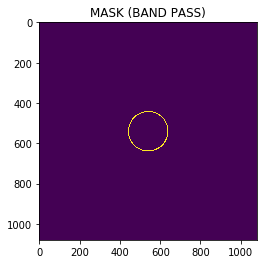

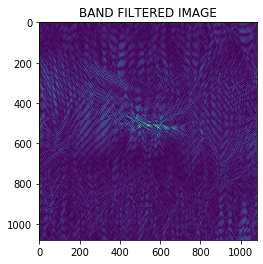

In [94]:
# BAND FILTER
R = 100
M = X**2 + Y**2 < R**2 
M2 = X**2 + Y**2 < (R-5)**2

M = M ^ M2


DD1 = fftpack.fft2(M)/n
DD2 = fftpack.fftshift(DD1)
D3 = fftpack.fft2(DD1)/n


abs_image = np.abs(D3)
py.imshow(abs_image)
py.title("MASK (BAND PASS)")
py.show()


f_filtered_shifted = np.fft.fftshift(D2*M)
inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)
py.imshow(filtered_img)
py.title("BAND FILTERED IMAGE")
py.show()

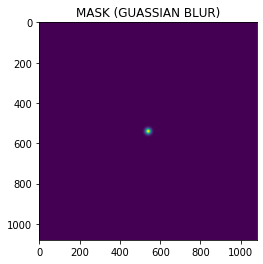

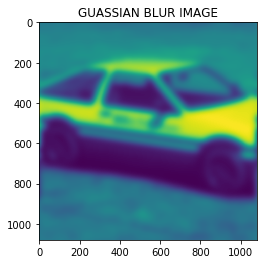

In [97]:
# GUASSIAN BLUR
sigma = 10
def g(x,y):
    return (1/(2*np.pi*sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))

R = 100
M = g(X,Y)


DD1 = fftpack.fft2(M)/n
DD2 = fftpack.fftshift(DD1)
D3 = fftpack.fft2(DD1)/n

abs_image = np.abs(D3)
py.imshow(abs_image)
py.title("MASK (GUASSIAN BLUR)")
py.show()

f_filtered_shifted = np.fft.fftshift(D2*M)
inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)
py.imshow(filtered_img)
py.title("GUASSIAN BLUR IMAGE")
py.show()